# Dependencies

In [1]:
# library importsm
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [7]:
# extra library imports
import missingno as msno
msno.matrix(mush_metadata)
# black have value coulumn integer string or anything
# white is nan
msno.bar(mush_metadata)

ModuleNotFoundError: No module named 'missingno'

# Data Cleaning

In [4]:
# import csv
mush_path = 'Resources/Raw/secondary_data.csv'
mush_metadata = pd.read_csv(mush_path, sep=';')
mush_metadata.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


In [65]:
# # data check
# mush_metadata.columns
# mush_metadata.info()

# # grouping poisonus and edibles
# mush_group=mush_metadata.groupby("class")
# mush_group.groups

# #
# pd.pivot_table(mush_metadata,index="class",columns=["cap-color","gill-color","stem-color"],aggfunc=np.mean)

In [60]:
#creating dfs for each class
mush_p_df=mush_metadata.loc[mush_metadata['class']=='p']
mush_e_df=mush_metadata.loc[mush_metadata['class']=='e']

# Data Graphing

### Pie Charts

In [39]:
# mark autopct values
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d} ({p:.1f})%'.format(p=pct,v=val)
    return my_autopct

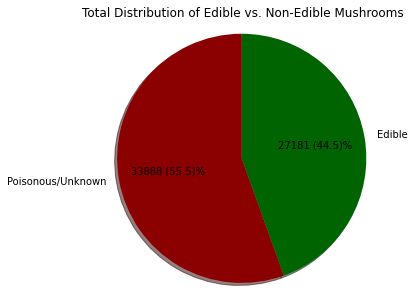

In [61]:
# setting values
labels = ['Poisonous/Unknown', 'Edible']
values = mush_metadata['class'].value_counts().to_list()
colors = ['darkred', 'darkgreen']

# graphing pie charts
plt.figure(figsize = (5,5))
plt.pie(values, labels=labels, colors=colors, autopct=make_autopct(values), shadow=True, startangle=90)
plt.title('Total Distribution of Edible vs. Non-Edible Mushrooms')
plt.axis('equal')
plt.savefig('Resources/Models/pie-chart-poi-edi.png')

Text(0.5, 1.0, 'Poisonous v/s Edible')

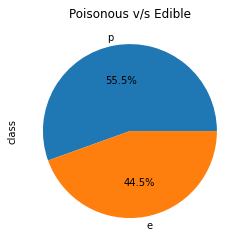

In [57]:
# # old
# ax=mush_metadata["class"].value_counts().plot(kind='pie',autopct= "%1.1f%%")
# # p is poisonus and e is edible-binary 
# ax.set_title("Poisonous v/s Edible")

<AxesSubplot:>

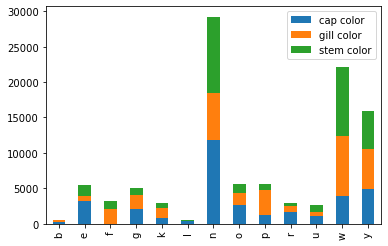

In [ ]:
# old
index1=mush_p_df['cap-color'].value_counts()
index2=mush_p_df['gill-color'].value_counts()
index3=mush_p_df['stem-color'].value_counts()
p_stack=pd.DataFrame({"cap color":index1,"gill color":index2,"stem color":index3})
p_stack.plot(kind="bar",stacked=True)

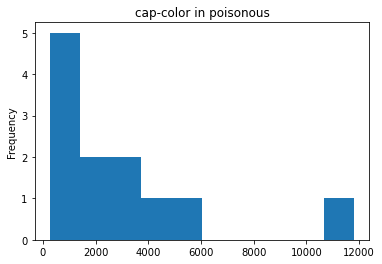

In [ ]:
p_cap_color= mush_p_df["cap-color"].value_counts()
cap_pie=p_cap_color.plot(kind='hist', y='cap-color', title='cap-color in poisonous',stacked=True)
plt.show()

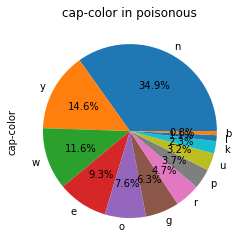

In [ ]:
p_cap_color= mush_p_df["cap-color"].value_counts()
cap_pie=p_cap_color.plot(kind='pie', y='cap-color', title='cap-color in poisonous',autopct= "%1.1f%%")
plt.show()

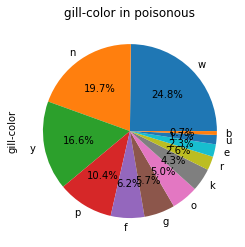

In [ ]:
p_cap_color= mush_p_df["gill-color"].value_counts()
gil_pie=p_cap_color.plot(kind='pie', y='gil-color', title='gill-color in poisonous',autopct= "%1.1f%%")
plt.show()

In [ ]:
p_cap_color= mush_p_df["stem-color"].value_counts()
cap_pie=p_cap_color.plot(kind='pie', y='stem-color', title='stem-color in poisonous',autopct= "%1.1f%%")
plt.show()

In [ ]:
mush_e_df=mush_metadata.loc[mush_metadata['class']=='e']
mush_e_df
#creating Df for edible

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
1059,e,10.42,f,NaN,n,t,NaN,NaN,w,11.50,...,b,NaN,w,u,w,t,g,NaN,d,a
1060,e,9.59,f,NaN,n,t,NaN,NaN,w,9.87,...,b,NaN,w,u,w,t,g,NaN,d,u
1061,e,9.10,f,NaN,n,t,NaN,NaN,w,11.45,...,b,NaN,w,u,w,t,g,NaN,d,a
1062,e,8.86,x,NaN,n,t,NaN,NaN,w,11.25,...,b,NaN,w,u,w,t,g,NaN,d,u
1063,e,9.59,x,NaN,n,t,NaN,NaN,w,7.82,...,b,NaN,w,u,w,t,g,NaN,d,u
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60711,e,4.67,o,NaN,n,f,f,f,f,4.69,...,NaN,NaN,n,NaN,NaN,f,f,NaN,d,s
60712,e,7.28,c,NaN,n,f,f,f,f,5.29,...,NaN,NaN,n,NaN,NaN,f,f,NaN,l,s
60713,e,6.60,p,NaN,n,f,f,f,f,5.52,...,NaN,NaN,n,NaN,NaN,f,f,NaN,l,s
60714,e,4.19,c,NaN,n,f,f,f,f,4.22,...,NaN,NaN,n,NaN,NaN,f,f,NaN,d,s


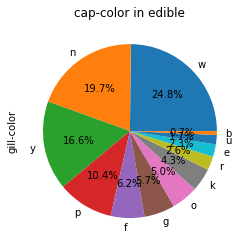

In [ ]:
e_cap_color= mush_e_df["cap-color"].value_counts()
p_pie=p_cap_color.plot(kind='pie', y='cap-color', title='cap-color in edible',autopct= "%1.1f%%")
plt.show()

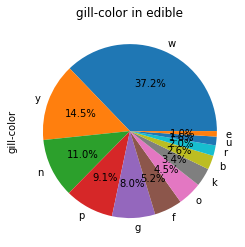

In [ ]:
e_cap_color= mush_e_df["gill-color"].value_counts()
e_pie=e_cap_color.plot(kind='pie', y='gill-color', title='gill-color in edible',autopct= "%1.1f%%")
plt.show()

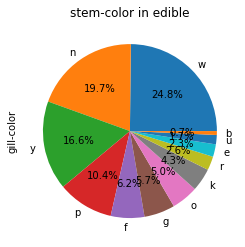

In [ ]:
e_cap_color= mush_e_df["stem-color"].value_counts()
p_pie=p_cap_color.plot(kind='pie', y='stem-color', title='stem-color in edible',autopct= "%1.1f%%")
plt.show()

<AxesSubplot:>

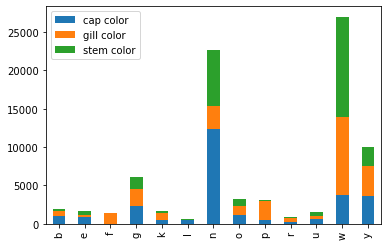

In [ ]:
index1=mush_e_df['cap-color'].value_counts()
index2=mush_e_df['gill-color'].value_counts()
index3=mush_e_df['stem-color'].value_counts()
e_stack=pd.DataFrame({"cap color":index1,"gill color":index2,"stem color":index3})
e_stack.plot(kind="bar",stacked=True)

<AxesSubplot:>

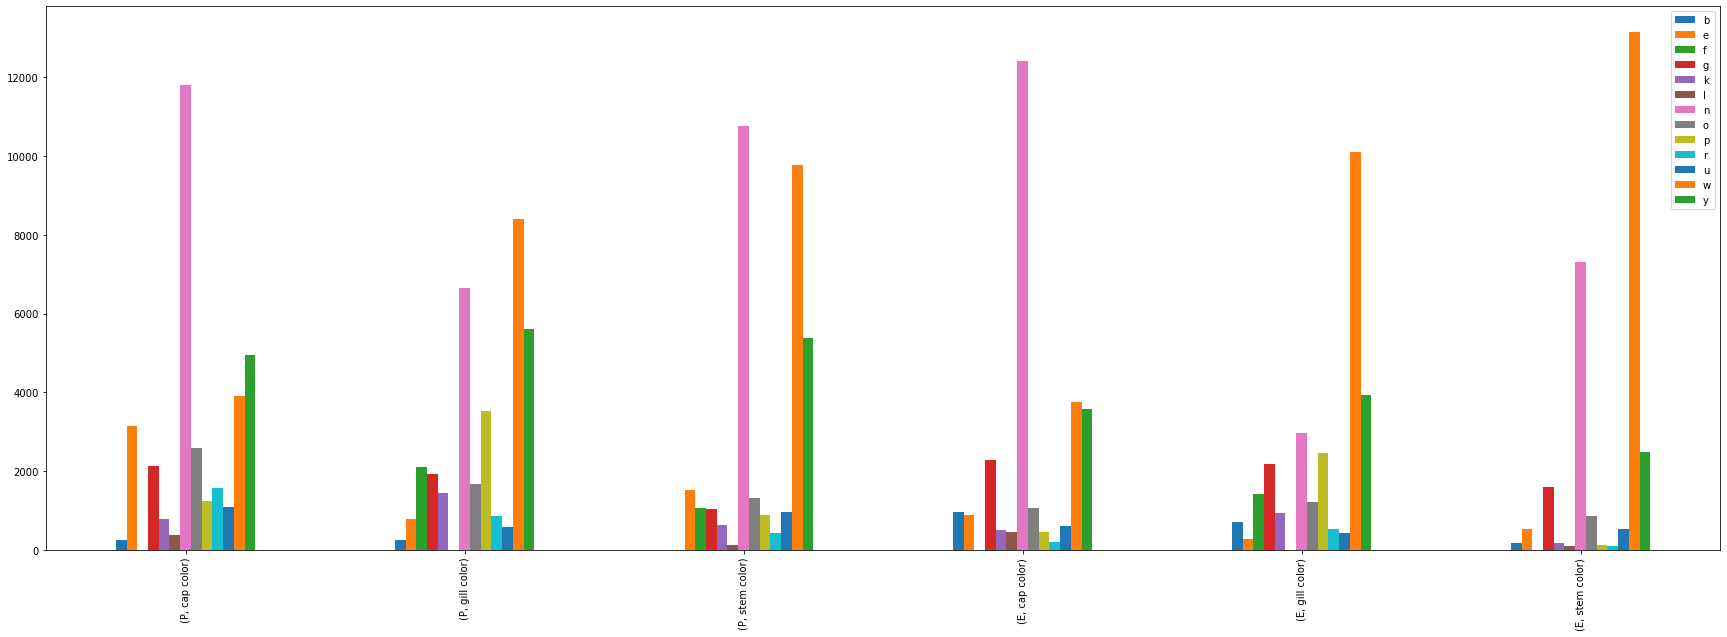

In [ ]:
pd.concat({"P":p_stack.T,"E":e_stack.T}).plot(kind="bar",figsize=(30,10))

<AxesSubplot:>

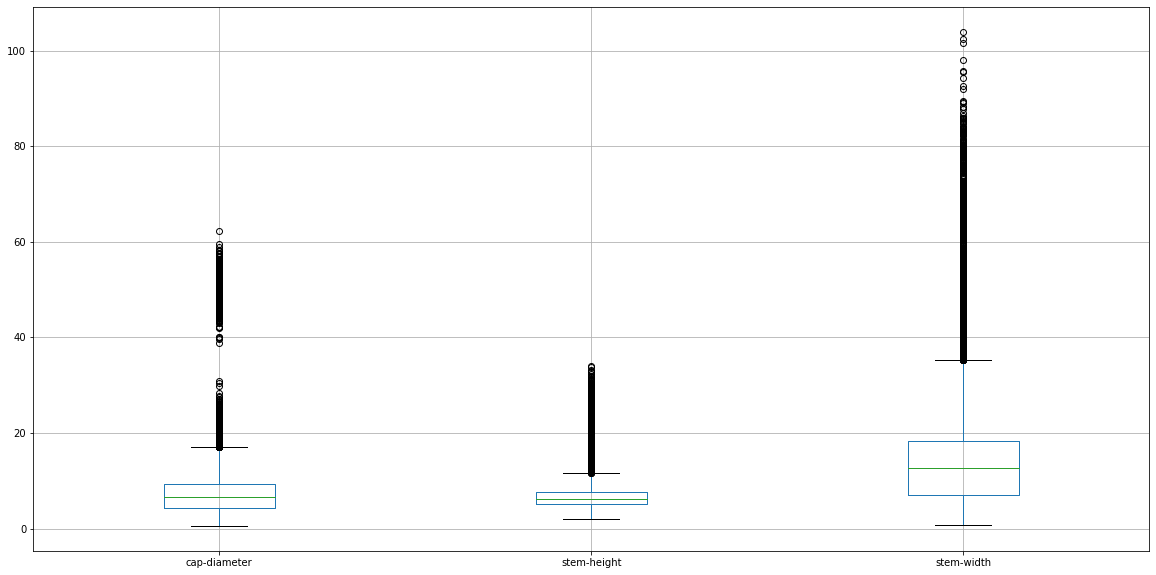

In [ ]:
mush_e_df.boxplot(column =["cap-diameter","stem-height","stem-width"],figsize=(20,10))
#mush_e_df["cap-surface"].value_counts()

<AxesSubplot:>

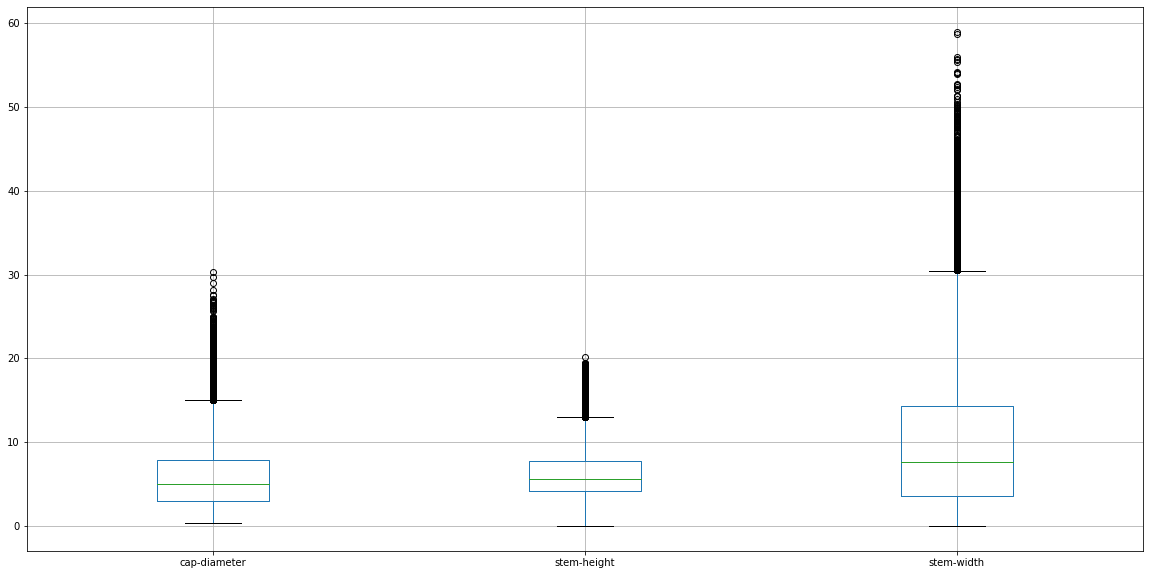

In [ ]:
mush_p_df.boxplot(column =["cap-diameter","stem-height","stem-width"],figsize=(20,10))
#mush_e_df["cap-surface"].value_counts()

In [ ]:
# outliers are higher e vs p
# median is is higher in e vs p
# inner quartile is bigger in p vs e

In [ ]:
mush_e_df.dtypes

class                    object
cap-diameter            float64
cap-shape                object
cap-surface              object
cap-color                object
does-bruise-or-bleed     object
gill-attachment          object
gill-spacing             object
gill-color               object
stem-height             float64
stem-width              float64
stem-root                object
stem-surface             object
stem-color               object
veil-type                object
veil-color               object
has-ring                 object
ring-type                object
spore-print-color        object
habitat                  object
season                   object
dtype: object

In [ ]:
mush_group ["cap-diameter"].mean()
# edible has a bigger cap diameter on average

In [ ]:
mush_group ["cap-diameter"].median()
# edible has a bigger cap diameter on median too!

In [ ]:
mush_group ["stem-height"].mean()

In [ ]:
mush_group ["stem-height"].median()

In [ ]:
mush_group ["stem-width"].mean()

In [ ]:
mush_group ["stem-width"].median()

In [ ]:
mush_corr = mush_metadata.corr()
mush_corr

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

sn.heatmap(mush_corr, annot=True)

In [ ]:
# for machine learning u shouldnt take the one which are high correlated because it tends to 
#confuse machine learning algorithm but in our instance we have .69


In [ ]:
# trying to see if class_encoded has any cor relation individually with others. bsacially no correlation.
# During machine learning it can still find them 
mush_metadata["class_encoded"] = mush_metadata["class"].map(lambda x: 1 if x == 'e' else 0)
y_corr = mush_metadata.corr()
sn.heatmap(y_corr, annot=True)